In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import librosa
import librosa.display
import IPython.display as ipd
import scipy
from scipy import mean
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
crema_directory_list = os.listdir("/content/drive/MyDrive/AudioMP3v2")

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append("/content/drive/MyDrive/AudioMP3v2" + "/" + file)
    part = file.split('_')[2]
    if part=='ANG':
        file_emotion.append('angry')
    elif part=='SAD':
        file_emotion.append('sad')
    elif part=='FEA':
        file_emotion.append('fear')
    elif part=='DIS':
        file_emotion.append('disgust')
    elif part=='NEU':
        file_emotion.append('neutral')
    elif part=='HAP':
        file_emotion.append('happy')
    else:
        file_emotion.append('unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/AudioMP3v2/1080_DFA_SAD...
1,happy,/content/drive/MyDrive/AudioMP3v2/1079_WSI_HAP...
2,fear,/content/drive/MyDrive/AudioMP3v2/1080_IOM_FEA...
3,disgust,/content/drive/MyDrive/AudioMP3v2/1079_MTI_DIS...
4,sad,/content/drive/MyDrive/AudioMP3v2/1079_ITS_SAD...


In [ ]:
def zcr_stats(series):
  zcr_mean= []
  zcr_std = []
  zcr_kurt = []
  zcr_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      zcr = np.ravel(librosa.feature.zero_crossing_rate(y = y,frame_length=2048, hop_length=512))

      zcr_mean.append(mean(zcr))
      zcr_std.append(np.std(zcr))
      zcr_kurt.append(kurtosis(zcr))
      zcr_skew.append(skew(zcr))

  df = pd.DataFrame()
  df['zcr_mean'] = zcr_mean
  df['zcr_std'] = zcr_std
  df['zcr_kurt'] = zcr_kurt
  df['zcr_skew'] = zcr_skew

  return df

In [ ]:
def rms_stats(series):
  rms_mean= []
  rms_std = []
  rms_kurt = []
  rms_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      rms = np.ravel(librosa.feature.rms(y = y,frame_length=2048, hop_length=512))

      rms_mean.append(mean(rms))
      rms_std.append(np.std(rms))
      rms_kurt.append(kurtosis(rms))
      rms_skew.append(skew(rms))

  df = pd.DataFrame()
  df['rms_mean'] = rms_mean
  df['rms_std'] = rms_std
  df['rms_kurt'] = rms_kurt
  df['rms_skew'] = rms_skew

  return df

In [ ]:
def mfcc_stats(series):
  mfcc_mean= []
  mfcc_std = []
  mfcc_kurt = []
  mfcc_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      mfcc = np.ravel(librosa.feature.mfcc(y = y,sr=sr, hop_length=512))

      mfcc_mean.append(mean(mfcc))
      mfcc_std.append(np.std(mfcc))
      mfcc_kurt.append(kurtosis(mfcc))
      mfcc_skew.append(skew(mfcc))

  df = pd.DataFrame()
  df['mfcc_mean'] = mfcc_mean
  df['mfcc_std'] = mfcc_std
  df['mfcc_kurt'] = mfcc_kurt
  df['mfcc_skew'] = mfcc_skew

  return df

In [ ]:
def ms_stats(series):
  ms_mean= []
  ms_std = []
  ms_kurt = []
  ms_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      ms = np.ravel(librosa.feature.melspectrogram(y = y,sr=sr, hop_length=512))

      ms_mean.append(mean(ms))
      ms_std.append(np.std(ms))
      ms_kurt.append(kurtosis(ms))
      ms_skew.append(skew(ms))

  df = pd.DataFrame()
  df['ms_mean'] = ms_mean
  df['ms_std'] = ms_std
  df['ms_kurt'] = ms_kurt
  df['ms_skew'] = ms_skew

  return df

In [ ]:
def chroma_stft(series):
  chroma_mean= []
  chroma_std = []
  chroma_kurt = []
  chroma_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      chroma = np.ravel(librosa.feature.chroma_stft(y = y,sr=sr, hop_length=512))

      chroma_mean.append(mean(chroma))
      chroma_std.append(np.std(chroma))
      chroma_kurt.append(kurtosis(chroma))
      chroma_skew.append(skew(chroma))

  df = pd.DataFrame()
  df['chroma_mean'] = chroma_mean
  df['chroma_std'] = chroma_std
  df['chroma_kurt'] = chroma_kurt
  df['chroma_skew'] = chroma_skew

  return df

In [ ]:
def s_centroid(series):
  centroid_mean= []
  centroid_std = []
  centroid_kurt = []
  centroid_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      centroid = np.ravel(librosa.feature.spectral_centroid(y = y,sr=sr, hop_length=512))

      centroid_mean.append(mean(centroid))
      centroid_std.append(np.std(centroid))
      centroid_kurt.append(kurtosis(centroid))
      centroid_skew.append(skew(centroid))

  df = pd.DataFrame()
  df['centroid_mean'] = centroid_mean
  df['centroid_std'] = centroid_std
  df['centroid_kurt'] = centroid_kurt
  df['centroid_skew'] = centroid_skew

  return df

In [ ]:
def s_bandwidth(series):
  bandwidth_mean= []
  bandwidth_std = []
  bandwidth_kurt = []
  bandwidth_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      bandwidth = np.ravel(librosa.feature.spectral_bandwidth(y = y,sr=sr, hop_length=512))

      bandwidth_mean.append(mean(bandwidth))
      bandwidth_std.append(np.std(bandwidth))
      bandwidth_kurt.append(kurtosis(bandwidth))
      bandwidth_skew.append(skew(bandwidth))

  df = pd.DataFrame()
  df['bandwidth_mean'] = bandwidth_mean
  df['bandwidth_std'] = bandwidth_std
  df['bandwidth_kurt'] = bandwidth_kurt
  df['bandwidth_skew'] = bandwidth_skew

  return df

In [ ]:
def s_contrast(series):
  contrast_mean= []
  contrast_std = []
  contrast_kurt = []
  contrast_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      contrast = np.ravel(librosa.feature.spectral_contrast(y = y,sr=sr, hop_length=512))

      contrast_mean.append(mean(contrast))
      contrast_std.append(np.std(contrast))
      contrast_kurt.append(kurtosis(contrast))
      contrast_skew.append(skew(contrast))

  df = pd.DataFrame()
  df['contrast_mean'] = contrast_mean
  df['contrast_std'] = contrast_std
  df['contrast_kurt'] = contrast_kurt
  df['contrast_skew'] = contrast_skew

  return df

In [ ]:
def s_flatness(series):
  flatness_mean= []
  flatness_std = []
  flatness_kurt = []
  flatness_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      flatness = np.ravel(librosa.feature.spectral_flatness(y = y,hop_length=512))

      flatness_mean.append(mean(flatness))
      flatness_std.append(np.std(flatness))
      flatness_kurt.append(kurtosis(flatness))
      flatness_skew.append(skew(flatness))

  df = pd.DataFrame()
  df['flatness_mean'] = flatness_mean
  df['flatness_std'] = flatness_std
  df['flatness_kurt'] = flatness_kurt
  df['flatness_skew'] = flatness_skew

  return df

In [ ]:
def s_rolloff(series):
  rolloff_mean= []
  rolloff_std = []
  rolloff_kurt = []
  rolloff_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      rolloff = np.ravel(librosa.feature.spectral_rolloff(y = y,sr=sr, hop_length=512))

      rolloff_mean.append(mean(rolloff))
      rolloff_std.append(np.std(rolloff))
      rolloff_kurt.append(kurtosis(rolloff))
      rolloff_skew.append(skew(rolloff))

  df = pd.DataFrame()
  df['rolloff_mean'] = rolloff_mean
  df['rolloff_std'] = rolloff_std
  df['rolloff_kurt'] = rolloff_kurt
  df['rolloff_skew'] = rolloff_skew

  return df

In [ ]:
def tonnetz(series):
  tonnetz_mean= []
  tonnetz_std = []
  tonnetz_kurt = []
  tonnetz_skew = []

  for sound in series:
      y,sr = librosa.load(sound)
      tonnetz = np.ravel(librosa.feature.tonnetz(y = y,sr=sr, hop_length=512))

      tonnetz_mean.append(mean(tonnetz))
      tonnetz_std.append(np.std(tonnetz))
      tonnetz_kurt.append(kurtosis(tonnetz))
      tonnetz_skew.append(skew(tonnetz))

  df = pd.DataFrame()
  df['tonnetz_mean'] = tonnetz_mean
  df['tonnetz_std'] = tonnetz_std
  df['tonnetz_kurt'] = tonnetz_kurt
  df['tonnetz_skew'] = tonnetz_skew

  return df

In [ ]:
zcr_df = zcr_stats(crema_df["Path"])
rms_stats_df = rms_stats(crema_df["Path"])
mfcc_stats_df = mfcc_stats(crema_df["Path"])
ms_stats_df = ms_stats(crema_df["Path"])
chroma_stft_df = chroma_stft(crema_df["Path"])
s_centroid_df = s_centroid(crema_df["Path"])
s_bandwidth_df = s_bandwidth(crema_df["Path"])
s_contrast_df = s_contrast(crema_df["Path"])
s_flatness_df = s_flatness(crema_df["Path"])
s_rolloff_df = s_rolloff(crema_df["Path"])
tonnetz_df = tonnetz(crema_df["Path"])

In [ ]:
df = crema_df.join(zcr_df).join(rms_stats_df).join(mfcc_stats_df).join(ms_stats_df).join(chroma_stft_df).join(s_centroid_df).join(s_bandwidth_df).join(s_contrast_df).join(s_flatness_df).join(s_rolloff_df).join(tonnetz_df)
df.to_csv("features.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/features.csv")
df

,Unnamed: 0,Emotions,Path,zcr_mean,zcr_std,zcr_kurt,zcr_skew,rms_mean,rms_std,rms_kurt,...,flatness_kurt,flatness_skew,rolloff_mean,rolloff_std,rolloff_kurt,rolloff_skew,tonnetz_mean,tonnetz_std,tonnetz_kurt,tonnetz_skew
0,0,sad,/content/drive/MyDrive/AudioMP3v2/1080_DFA_SAD...,0.058597,0.039075,10.092867,2.913913,0.004268,0.002964,2.303705,...,9.816680,3.144686,4128.515625,1185.345285,0.258344,0.007245,-0.013781,0.057217,0.508432,-0.689256
1,1,happy,/content/drive/MyDrive/AudioMP3v2/1079_WSI_HAP...,0.141282,0.177162,4.041194,2.274098,0.027020,0.029180,0.635497,...,9.754680,2.868367,4623.395852,2339.341742,0.164593,1.107801,0.000703,0.089135,3.234119,0.946852
2,2,fear,/content/drive/MyDrive/AudioMP3v2/1080_IOM_FEA...,0.053000,0.044323,11.019199,3.338779,0.008650,0.007059,-0.465263,...,50.860959,7.080762,3386.742188,1640.241851,1.295247,0.715977,-0.018021,0.077130,2.561824,0.273514
3,3,disgust,/content/drive/MyDrive/AudioMP3v2/1079_MTI_DIS...,0.059155,0.043057,12.648307,3.331930,0.010371,0.009886,0.956121,...,43.529293,6.489832,3021.714020,1884.705750,1.435774,0.977067,-0.008245,0.068835,1.217407,0.092378
4,4,sad,/content/drive/MyDrive/AudioMP3v2/1079_ITS_SAD...,0.060683,0.064136,11.595819,3.327559,0.004240,0.002723,1.364180,...,20.644408,4.460348,4240.124926,1679.539327,0.820712,0.536744,-0.014471,0.071169,3.638048,-0.010541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,7437,disgust,/content/drive/MyDrive/AudioMP3v2/1006_DFA_DIS...,0.065058,0.044065,1.370692,1.463584,0.004337,0.002210,1.224493,...,8.053693,2.746098,3796.428283,1717.149235,0.273205,0.819219,-0.011144,0.055595,1.164427,-0.904291
7438,7438,neutral,/content/drive/MyDrive/AudioMP3v2/1006_ITS_NEU...,0.063244,0.072146,8.399253,2.946215,0.006195,0.004125,2.343503,...,10.821244,3.440228,3410.321045,2065.641166,2.299100,1.620358,-0.000028,0.075435,1.235398,-0.351864
7439,7439,neutral,/content/drive/MyDrive/AudioMP3v2/1005_TSI_NEU...,0.149267,0.181596,1.337789,1.661552,0.006114,0.004805,2.050908,...,1.488547,1.676104,4366.425900,2448.961197,-0.639742,0.982347,-0.014854,0.074647,2.913644,0.469798
7440,7440,neutral,/content/drive/MyDrive/AudioMP3v2/1006_IWL_NEU...,0.040957,0.021708,11.840795,3.039095,0.006493,0.004971,2.700125,...,3.527575,1.611960,2424.590101,936.493292,-0.364365,0.377911,-0.016569,0.072871,1.161313,-0.613531


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop(columns=["Emotions","Path","Unnamed: 0"],axis=1)
y = df["Emotions"]

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
>>> from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
print('train: {}'.format(lr.score(X_train,y_train)))
print('test: {}:'.format( lr.score(X_test,y_test)))

train: 0.324432114503612
test: 0.3140466891752731:


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_


0.4576210306053214

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100)

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,
                           random_state=100)

In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       309
           1       0.40      0.29      0.33       327
           2       0.42      0.36      0.39       310
           3       0.46      0.43      0.45       331
           4       0.42      0.53      0.46       264
           5       0.49      0.56      0.52       312

    accuracy                           0.47      1853
   macro avg       0.46      0.48      0.47      1853
weighted avg       0.47      0.47      0.46      1853



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=120)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=120)

In [ ]:
from sklearn.metrics import classification_report

pred=neigh.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       309
           1       0.40      0.22      0.28       327
           2       0.43      0.08      0.14       310
           3       0.44      0.31      0.37       331
           4       0.32      0.63      0.42       264
           5       0.42      0.60      0.49       312

    accuracy                           0.42      1853
   macro avg       0.43      0.43      0.39      1853
weighted avg       0.43      0.42      0.39      1853



In [ ]:
 from xgboost import XGBClassifier

 model = XGBClassifier(max_depth=6, n_estimators=1000, n_jobs=-1, random_state=42)
 model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
pred=model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66       309
           1       0.41      0.30      0.35       327
           2       0.44      0.38      0.41       310
           3       0.45      0.40      0.42       331
           4       0.42      0.50      0.46       264
           5       0.50      0.59      0.54       312

    accuracy                           0.48      1853
   macro avg       0.47      0.48      0.47      1853
weighted avg       0.47      0.48      0.47      1853



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       309
           1       0.41      0.33      0.37       327
           2       0.46      0.36      0.41       310
           3       0.51      0.42      0.46       331
           4       0.45      0.52      0.48       264
           5       0.51      0.68      0.58       312

    accuracy                           0.50      1853
   macro avg       0.49      0.50      0.49      1853
weighted avg       0.49      0.50      0.49      1853



In [ ]:
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.Input(shape=(44,)))
model.add(tensorflow.keras.layers.Dense(512,activation="relu"))
model.add(tensorflow.keras.layers.Dense(256,activation="relu"))
model.add(tensorflow.keras.layers.Dense(128,activation="relu"))
model.add(tensorflow.keras.layers.Dense(64,activation="relu"))
model.add(tensorflow.keras.layers.Dense(6,activation="softmax"))

from keras.optimizers import SGD
opt = SGD(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
model1 = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/20
87/87 [==============================] - 3s 18ms/step - loss: 1.7487 - accuracy: 0.2751 - val_loss: 1.6754 - val_accuracy: 0.3287
Epoch 2/20
87/87 [==============================] - 1s 13ms/step - loss: 1.6332 - accuracy: 0.3396 - val_loss: 1.5846 - val_accuracy: 0.3573
Epoch 3/20
87/87 [==============================] - 1s 12ms/step - loss: 1.5585 - accuracy: 0.3635 - val_loss: 1.5257 - val_accuracy: 0.3751
Epoch 4/20
87/87 [==============================] - 1s 9ms/step - loss: 1.5060 - accuracy: 0.3900 - val_loss: 1.4826 - val_accuracy: 0.3999
Epoch 5/20
87/87 [==============================] - 1s 8ms/step - loss: 1.4669 - accuracy: 0.4116 - val_loss: 1.4495 - val_accuracy: 0.4150
Epoch 6/20
87/87 [==============================] - 1s 8ms/step - loss: 1.4352 - accuracy: 0.4245 - val_loss: 1.4250 - val_accuracy: 0.4307
Epoch 7/20
87/87 [==============================] - 1s 8ms/step - loss: 1.4090 - accuracy: 0.4371 - val_loss: 1.4025 - val_accuracy: 0.4409
Epoch 8/20
87/87 

In [ ]:
y_hat=model.predict(X_test)
y_pred=np.argmax(y_hat, axis=1)

58/58 [==============================] - 1s 6ms/step


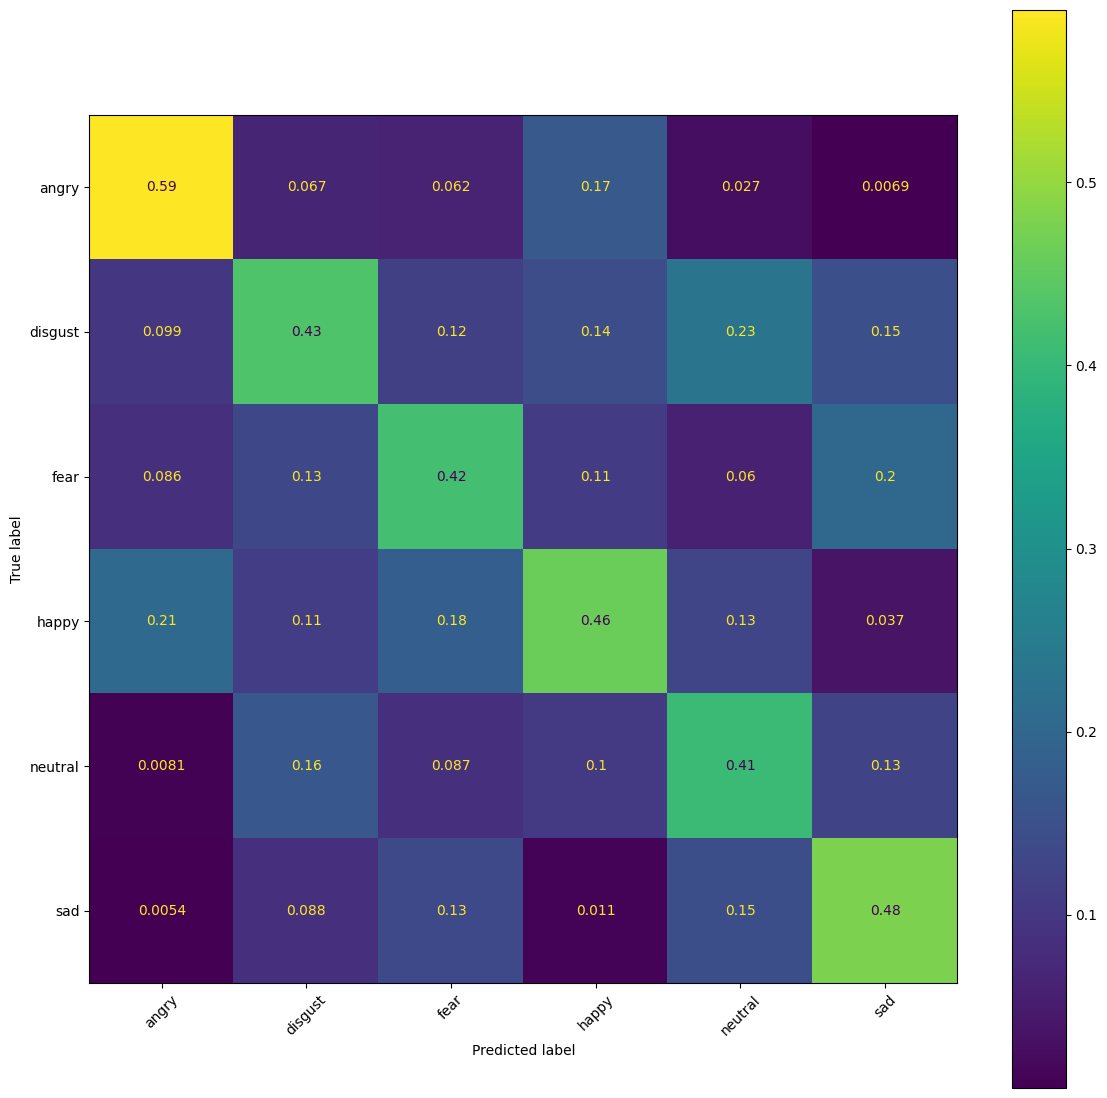

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,  confusion_matrix

fig, ax = plt.subplots(figsize=(14,14))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=encoder.classes_, ax=ax, normalize='pred')
plt.xticks(rotation=45);